## Análisis de los casos de covid en Uruguay

La data para este análisis proviene de del repositorio de GitHub de [Our World In Data](https://github.com/owid/covid-19-data), la cual se actualiza diariamente.

### Importando los paquetes necesarios

In [9]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

#### Leyendo los datos de la fuente

In [10]:
# Reading data and storing in pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
print('dataframe has: {} rows'.format(df.shape[0]))

dataframe has: 98638 rows


#### Seleccionando  un subset de datos

In [11]:
# Selecting a subset of data corresponding to the location Uruguay
uy = df[df["location"] == "Uruguay"]
# Printing first 5 rows
uy.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
94004,URY,South America,Uruguay,2020-03-13,4.0,4.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94005,URY,South America,Uruguay,2020-03-14,6.0,2.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94006,URY,South America,Uruguay,2020-03-15,8.0,2.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94007,URY,South America,Uruguay,2020-03-16,29.0,21.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94008,URY,South America,Uruguay,2020-03-17,50.0,21.0,NaN,NaN,NaN,NaN,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN


In [12]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy.shape[0]))

dataframe has: 472 rows


##### Mostrando los últimos registros que se actualizaron en la base de datos

In [13]:
# Display
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
94471,URY,South America,Uruguay,2021-06-23,360247.0,1786.0,1961.714,5374.0,24.0,36.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94472,URY,South America,Uruguay,2021-06-24,361994.0,1747.0,1904.571,5413.0,39.0,37.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94473,URY,South America,Uruguay,2021-06-25,363580.0,1586.0,1743.143,5447.0,34.0,34.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94474,URY,South America,Uruguay,2021-06-26,364859.0,1279.0,1640.286,5474.0,27.0,33.286,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN
94475,URY,South America,Uruguay,2021-06-27,365866.0,1007.0,1571.571,5494.0,20.0,31.857,...,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817,NaN


#### Creando columnas separadas para día, mes y año

In [15]:
# Creating separate columns for day, month and year
uy['year'] = pd.DatetimeIndex(uy['date']).year
uy['month'] = pd.DatetimeIndex(uy['date']).month
uy['month'] = uy['month'].apply(lambda x: calendar.month_abbr[x])
uy['day'] = pd.DatetimeIndex(uy['date']).day

#Selecting data for 2021 year only
uy21 = uy[uy["year"] == 2021]

<ipython-input-15-90946e2be140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['year'] = pd.DatetimeIndex(uy['date']).year
<ipython-input-15-90946e2be140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['month'] = pd.DatetimeIndex(uy['date']).month
<ipython-input-15-90946e2be140>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [16]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy21.shape[0]))

dataframe has: 178 rows


#### Visualizando los datos para los casos ocurridos en Uruguay durante 2021

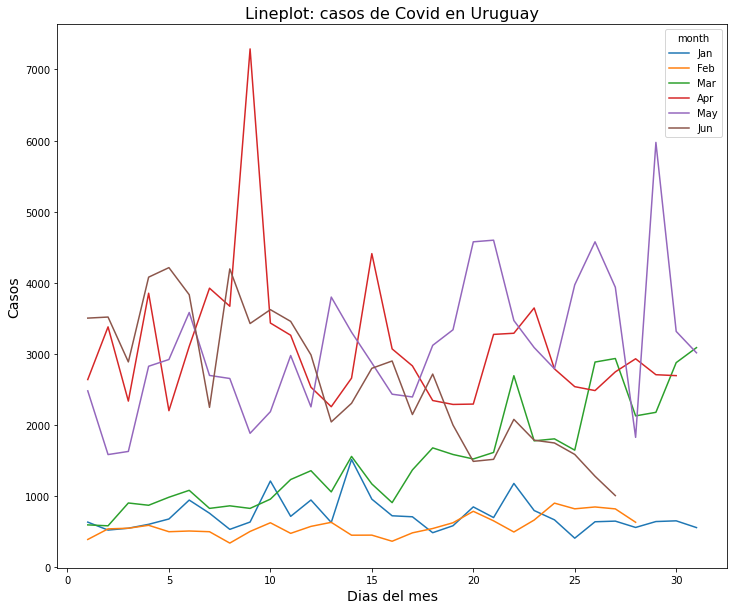

In [17]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=0)
sns.lineplot(x="day",
            y="new_cases",
            hue="month",
            data=uy21)
plt.ylabel("Casos", size=14)
plt.xlabel("Dias del mes", size=14)
plt.title("Lineplot: casos de Covid en Uruguay", size=16)

# Utilizando la funcion plt.show() se logra visualizar la grafica
plt.show()